In [0]:
import keras

import matplotlib.pyplot as plt
from  keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras import backend as K

In [0]:
nclasses=10
b_size=256
nepochs = 50

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows = 28
img_cols = 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

y_train = keras.utils.to_categorical(y_train, nclasses)
y_test = keras.utils.to_categorical(y_test, nclasses)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.25)
print(y_train.shape)

(45000, 10)


In [0]:
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from keras.models import Sequential

In [16]:
model = Sequential()

model.add(Conv2D(32,(3,3),strides=(1,1),padding = 'same', activation = 'relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),strides=(2,2),padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),strides=(1,1),padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nclasses, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 32)          18464     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [18]:
hist = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=nepochs, batch_size=b_size)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 5s 110us/step - loss: 2.3991 - acc: 0.2848 - val_loss: 1.2485 - val_acc: 0.5815
Epoch 2/50
45000/45000 [==============================] - 3s 66us/step - loss: 1.0842 - acc: 0.6069 - val_loss: 0.3393 - val_acc: 0.9097
Epoch 3/50
45000/45000 [==============================] - 3s 66us/step - loss: 0.5493 - acc: 0.8172 - val_loss: 0.1726 - val_acc: 0.9532
Epoch 4/50
45000/45000 [==============================] - 3s 66us/step - loss: 0.3697 - acc: 0.8836 - val_loss: 0.1328 - val_acc: 0.9617
Epoch 5/50
45000/45000 [==============================] - 3s 67us/step - loss: 0.2868 - acc: 0.9090 - val_loss: 0.1133 - val_acc: 0.9688
Epoch 6/50
45000/45000 [==============================] - 3s 66us/step - loss: 0.2312 - acc: 0.9282 - val_loss: 0.0943 - val_acc: 0.9711
Epoch 7/50
45000/45000 [==============================] - 3s 66us/step - loss: 

In [19]:
score= model.evaluate(x_test, y_test, batch_size=128)
score

10000/10000 [==============================] - 0s 28us/step


[0.03614757605483755, 0.9899]

In [20]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


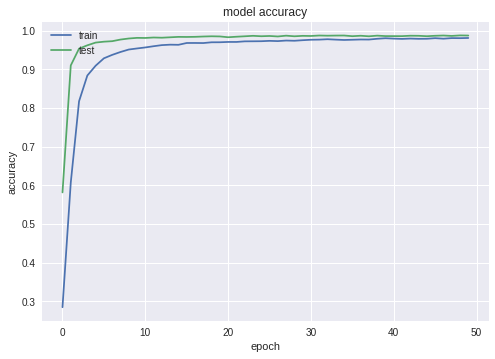

In [21]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

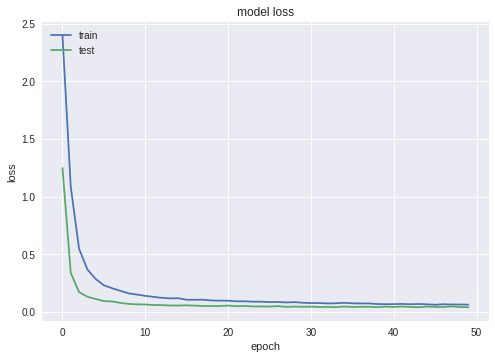

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('cnn.h5')a